In [63]:
artists = pd.read_table('lastfm/artists.dat', sep='\t', encoding='utf-8')
user_artists = pd.read_table('lastfm/user_artists.dat', sep='\t', encoding='utf-8')
user_friends = pd.read_table('lastfm/user_friends.dat', sep='\t', encoding='utf-8')
user_taggedartists = pd.read_table('lastfm/user_taggedartists.dat', sep='\t', encoding='utf-8')
user_taggedartists_timestamps = pd.read_table('lastfm/user_taggedartists-timestamps.dat', sep='\t', encoding='utf-8')
tags = pd.read_table('lastfm/tags.dat', sep='\t', index_col='tagID', encoding = 'ISO-8859-1')

In [64]:
artists

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...
...,...,...,...,...
17627,18741,Diamanda Galás,http://www.last.fm/music/Diamanda+Gal%C3%A1s,http://userserve-ak.last.fm/serve/252/16352971...
17628,18742,Aya RL,http://www.last.fm/music/Aya+RL,http://userserve-ak.last.fm/serve/252/207445.jpg
17629,18743,Coptic Rain,http://www.last.fm/music/Coptic+Rain,http://userserve-ak.last.fm/serve/252/344868.jpg
17630,18744,Oz Alchemist,http://www.last.fm/music/Oz+Alchemist,http://userserve-ak.last.fm/serve/252/29297695...


In [65]:
user_artists

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983
...,...,...,...
92829,2100,18726,337
92830,2100,18727,297
92831,2100,18728,281
92832,2100,18729,280


In [66]:
user_artists_name = pd.merge(user_artists, artists, left_on='artistID', right_on='id')
user_artists_name.tail()

,userID,artistID,weight,id,name,url,pictureURL
92829,2100,18726,337,18726,Nyktalgia,http://www.last.fm/music/Nyktalgia,http://userserve-ak.last.fm/serve/252/49060167...
92830,2100,18727,297,18727,Atsakau niekadA,http://www.last.fm/music/Atsakau++niekadA,http://userserve-ak.last.fm/serve/252/29862435...
92831,2100,18728,281,18728,Domantas Razauskas,http://www.last.fm/music/Domantas+Razauskas,http://userserve-ak.last.fm/serve/252/165556.jpg
92832,2100,18729,280,18729,Atalyja,http://www.last.fm/music/Atalyja,http://userserve-ak.last.fm/serve/252/98093.jpg
92833,2100,18730,263,18730,Les Chants de Nihil,http://www.last.fm/music/Les+Chants+de+Nihil,http://userserve-ak.last.fm/serve/252/34135877...


## 아이템 기반 최근접 이웃 협업 필터링 (Item Based Nearest Neighbor Collaborative Filtering)

In [5]:
table = pd.pivot_table(user_artists_name, values='weight', index='userID', columns='name')
table.fillna(0, inplace=True)

In [6]:
table.T

userID,2,3,4,5,6,7,8,9,10,11,...,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
name,,,,,,,,,,,,,,,,,,,,,
!!!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!DISTAIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!deladap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#####,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#2 Orchestra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ＲＥＤ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ＶａｎｅｓｓＡ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ｂｏｏｇｉｅｍａｎ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 코사인 유사도(Cosine Similarity)

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(table.T, table.T)
item_sim_df = pd.DataFrame(data=item_sim, index=table.columns, columns=table.columns)
item_sim_df.head()

name,!!!,!DISTAIN,!deladap,#####,#2 Orchestra,$lick,$lick feat. Six-Fo,(1962-1966),(Pre) Kingdom,(We Are) Performance,...,티아라,현아,ＬｕＬｕ,ＭＡＮＮＥＱＵＩＮ,ＰＥＲＥＳＴＲＯＩＫＡ,ＲＥＤ,ＶａｎｅｓｓＡ,ｂｏｏｇｉｅｍａｎ,ｂｏｒｎ,ｍａｃｈｉｎｅ
name,,,,,,,,,,,,,,,,,,,,,
!!!,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!DISTAIN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!deladap,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#####,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#2 Orchestra,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
item_sim_df['소녀시대'].sort_values(ascending=False)[1:10]

name
Brown Eyed Girls    0.697886
Super Junior        0.691643
U-KISS              0.681646
동방신기                0.661916
f(x)                0.659249
4minute             0.593870
放課後ティータイム           0.567331
和田光司                0.567331
티아라                 0.559596
Name: 소녀시대, dtype: float64

In [9]:
item_sim_df['김종국'].sort_values(ascending=False)[1:10]

name
Laith Al-Deen      1.0
Remi Bandali       1.0
TRAX               1.0
3mmey              1.0
Jay Park           1.0
Chinese mix        1.0
Wasted Land        1.0
モンゴル800            1.0
www.DjFahad.com    1.0
Name: 김종국, dtype: float64

### 유클리드 거리(Euclidean Distances)

In [10]:
from sklearn.metrics.pairwise import euclidean_distances

item_sim_eu = euclidean_distances(table.T, table.T)
item_sim_eu_df = pd.DataFrame(data=item_sim_eu, index=table.columns, columns=table.columns)
item_sim_eu_df.head()

name,!!!,!DISTAIN,!deladap,#####,#2 Orchestra,$lick,$lick feat. Six-Fo,(1962-1966),(Pre) Kingdom,(We Are) Performance,...,티아라,현아,ＬｕＬｕ,ＭＡＮＮＥＱＵＩＮ,ＰＥＲＥＳＴＲＯＩＫＡ,ＲＥＤ,ＶａｎｅｓｓＡ,ｂｏｏｇｉｅｍａｎ,ｂｏｒｎ,ｍａｃｈｉｎｅ
name,,,,,,,,,,,,,,,,,,,,,
!!!,0.000000,2784.943985,2634.407144,3110.005627,2637.539004,2980.251835,2634.589152,2634.243724,2633.605324,2633.605324,...,4459.295684,2806.628939,2801.410716,2693.739408,2660.169356,2659.888156,3413.716450,2660.593919,3488.014478,2954.000677
!DISTAIN,2784.943985,0.000000,907.888760,1885.814413,916.936748,1663.148219,908.416755,907.414459,905.559496,905.559496,...,3710.724862,1327.149954,1316.078645,1067.891848,980.133664,979.370206,2353.215035,981.285382,2459.757305,1615.636407
!deladap,2634.407144,907.888760,0.000000,1655.440727,157.990506,1396.513516,97.000000,87.114867,65.007692,65.007692,...,3599.120309,972.375956,957.210008,569.720107,380.591645,378.621183,2172.972388,383.547911,2287.923513,1339.577919
#####,3110.005627,1885.814413,1655.440727,0.000000,1660.420128,2163.858591,1655.730352,1655.180655,1654.164442,1654.164442,...,3960.517769,1917.693667,1910.048429,1748.317763,1696.137966,1695.696907,2730.172705,1696.803760,2822.521568,2127.557990
#2 Orchestra,2637.539004,916.936748,157.990506,1660.420128,0.000000,1402.412564,160.996894,155.241747,144.003472,144.003472,...,3601.413334,980.829241,965.796045,584.030821,401.697647,399.831214,2176.768247,404.499691,2291.528966,1345.726570


In [11]:
item_sim_eu_df['소녀시대'].sort_values()[1:10]

name
Super Junior        6164.521798
4minute             6395.739363
Brown Eyed Girls    6552.115460
티아라                 6595.666759
동방신기                6766.541140
f(x)                6809.382277
U-KISS              6920.971825
Trevor Morris       6925.390819
B2ST                6961.318912
Name: 소녀시대, dtype: float64

In [12]:
item_sim_eu_df['김종국'].sort_values()[1:10]

name
モンゴル800             375.000000
Jay Park            715.000000
C.N.BLUE            948.448206
T.M.Revolution      985.349177
TRAX               1014.000000
BUCK-TICK          1048.720172
Remi Bandali       1080.000000
Sinamore           1087.813403
www.DjFahad.com    1138.000000
Name: 김종국, dtype: float64

## 유저 기반 최근접 이웃 협업 필터링 (User Based Nearest Neighbor Collaborative Filtering)

### 코사인 유사도(Cosine Similarity)

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(table, table)
user_sim_df = pd.DataFrame(data=item_sim, index=table.index, columns=table.index)
user_sim_df.head()

userID,2,3,4,5,6,7,8,9,10,11,...,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
userID,,,,,,,,,,,,,,,,,,,,,
2,1.000000,0.0,0.144786,0.028692,0.007016,0.030219,0.008964,0.0,0.000000,0.021267,...,0.000000,0.043405,0.000000,0.004625,0.001585,0.0,0.000956,0.082134,0.000000,0.0
3,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000318,0.0
4,0.144786,0.0,1.000000,0.081193,0.006609,0.000000,0.000000,0.0,0.009072,0.013407,...,0.000000,0.000000,0.003776,0.006178,0.000000,0.0,0.045125,0.659085,0.000000,0.0
5,0.028692,0.0,0.081193,1.000000,0.000000,0.000000,0.000000,0.0,0.169078,0.004639,...,0.010993,0.000000,0.205141,0.000000,0.000000,0.0,0.204557,0.119133,0.000000,0.0
6,0.007016,0.0,0.006609,0.000000,1.000000,0.012713,0.018881,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


### 가장 비슷한 유저의 플레이 리스트 추천(중복 제거)

In [14]:
idx = user_sim_df[2].sort_values(ascending=False)[1:2].index.tolist()[0]
sim_user = table.loc[idx].sort_values(ascending=False)[:10].index.tolist()
target_user = table.loc[2].sort_values(ascending=False)[:10].index.tolist()
rec_song = [song for song in sim_user if song not in target_user]

In [15]:
rec_song

['Madonna',
 'Pet Shop Boys',
 'Arcadia',
 'Book of Love',
 'Depeche Mode',
 'George Michael',
 'Scissor Sisters',
 'Thompson Twins',
 'Erasure']

### 피어슨 유사도(Pearson Similarity)

In [80]:
corr = table.T.corr(method='pearson')

In [81]:
corr

userID,2,3,4,5,6,7,8,9,10,11,...,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
userID,,,,,,,,,,,,,,,,,,,,,
2,1.000000,-0.000471,0.143669,0.026981,0.005025,0.029390,0.007652,-0.001719,-0.001591,0.019815,...,-0.002003,0.041881,-0.000962,0.002683,0.000500,-0.001597,-0.000144,0.080981,-0.001743,-0.001850
3,-0.000471,1.000000,-0.000379,-0.000509,-0.000579,-0.000248,-0.000382,-0.000496,-0.000459,-0.000428,...,-0.000578,-0.000460,-0.000278,-0.000563,-0.000314,-0.000461,-0.000318,-0.000364,-0.000185,-0.000534
4,0.143669,-0.000379,1.000000,0.079895,0.005007,-0.000692,-0.001066,-0.001383,0.007804,0.012230,...,-0.001611,-0.001282,0.003004,0.004620,-0.000874,-0.001285,0.044279,0.658740,-0.001402,-0.001489
5,0.026981,-0.000509,0.079895,1.000000,-0.002168,-0.000930,-0.001432,-0.001859,0.167650,0.003043,...,0.008852,-0.001722,0.204354,-0.002108,-0.001174,-0.001726,0.203638,0.117941,-0.001884,-0.002000
6,0.005025,-0.000579,0.005007,-0.002168,1.000000,0.011673,0.017285,-0.002116,-0.001958,-0.001826,...,-0.002464,-0.001960,-0.001184,-0.002400,-0.001336,-0.001965,-0.001355,-0.001552,-0.002145,-0.002277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,-0.001597,-0.000461,-0.001285,-0.001726,-0.001965,-0.000843,-0.001298,-0.001684,-0.001559,-0.001454,...,-0.001962,-0.001561,-0.000943,-0.001911,-0.001064,1.000000,-0.001079,-0.001235,-0.001708,0.066250
2096,-0.000144,-0.000318,0.044279,0.203638,-0.001355,-0.000581,-0.000895,-0.001162,0.056861,0.000783,...,0.005311,-0.001076,0.055690,0.004618,-0.000734,-0.001079,1.000000,0.030012,-0.001178,-0.001250
2097,0.080981,-0.000364,0.658740,0.117941,-0.001552,-0.000665,-0.001025,-0.001330,0.109647,-0.001148,...,0.003007,0.021488,0.285919,-0.001509,-0.000840,-0.001235,0.030012,1.000000,-0.001349,-0.001431


## 잠재 인수 모델 (Latent Factor Model)

In [67]:
user_artists.userID = user_artists.userID.astype('category').cat.codes.values
user_artists.artistID = user_artists.artistID.astype('category').cat.codes.values
user_artists

,userID,artistID,weight
0,0,45,13883
1,0,46,11690
2,0,47,11351
3,0,48,10300
4,0,49,8983
...,...,...,...
92829,1891,17615,337
92830,1891,17616,297
92831,1891,17617,281
92832,1891,17618,280


In [70]:
user_artists.weight = user_artists.weight / user_artists.weight.max()

In [72]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, dot
from tensorflow.keras import regularizers

item_input = Input(shape=[1]) # mini_df.item
user_input = Input(shape=[1]) # mini_df.user

In [73]:
n_items = len(user_artists.artistID.unique()) # 영화 개수
n_items_latent_factors = 2 # 영화의 잠재 인수 개수

n_users = len(user_artists.userID.unique()) # 사용자 수 
n_users_latent_factors = 2 # 사용자의 잠재 인수 개수

# Item latent factor
item_embedding = Embedding(n_items, n_items_latent_factors, # (5X2) Latent factor
                           embeddings_regularizer=regularizers.l2(0.001),
                           name='item_embedding')(item_input)
# User latent factor
user_embedding = Embedding(n_users, n_users_latent_factors, # (4X2) Latent factor
                           embeddings_regularizer=regularizers.l2(0.001),
                           name='user_embedding')(user_input)

In [74]:
# Item latent vector
item_vec = Flatten()(item_embedding)
# User latent vector
user_vec = Flatten()(user_embedding)

In [75]:
r_hat = dot([item_vec, user_vec], axes=-1)
mini_model = Model([user_input, item_input], r_hat)
mini_model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

loss:  0.00011768757394747809


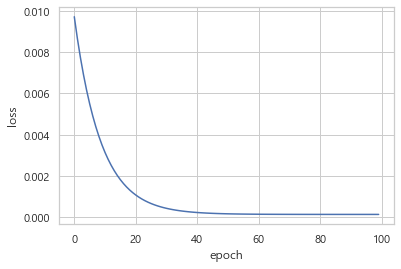

In [78]:
hist = mini_model.fit([user_artists.userID, user_artists.artistID], user_artists.weight, epochs=100, verbose=0) 
print('loss: ', hist.history['loss'][-1])

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [79]:
Q = mini_model.get_layer(name='item_embedding').get_weights()[0]
P = mini_model.get_layer(name='user_embedding').get_weights()[0]
P_t = np.transpose(P)

R_hat = np.dot(Q, P_t)
pd.DataFrame(R_hat)

,0,1,2,3,4,5,6,7,8,9,...,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891
0,-1.650113e-09,-4.825227e-10,1.471181e-09,1.984774e-09,-1.029162e-09,1.311078e-09,1.572091e-09,-4.220344e-10,-1.502733e-10,9.038781e-10,...,-2.621892e-09,-8.037265e-10,8.449001e-10,-1.432108e-10,-1.825137e-09,-1.368648e-09,-1.380765e-11,-1.376568e-10,-1.564368e-09,2.646463e-09
1,9.509762e-10,-3.275204e-10,-5.394149e-10,-4.432303e-09,-4.095148e-09,-4.117311e-09,-1.223667e-09,4.364337e-09,6.786351e-10,2.475584e-09,...,-7.754213e-10,-1.682037e-09,3.507399e-09,4.094539e-09,3.635829e-09,-2.776360e-09,-1.390357e-09,4.285619e-09,-3.415066e-09,6.046797e-10
2,2.220509e-09,5.149707e-10,-1.911301e-09,-3.400360e-09,3.448758e-10,-2.510040e-09,-2.185986e-09,1.482142e-09,3.335539e-10,-5.515836e-10,...,3.020983e-09,6.056561e-10,-2.508623e-10,1.082732e-09,3.029262e-09,1.050867e-09,-2.916196e-10,1.118358e-09,1.147530e-09,-3.088783e-09
3,-2.994255e-09,-1.457856e-11,2.231054e-09,8.276777e-09,4.797888e-09,7.158468e-09,3.304296e-09,-6.624870e-09,-1.114383e-09,-2.620014e-09,...,-1.506949e-09,1.591489e-09,-4.145660e-09,-5.963800e-09,-6.985544e-09,2.585082e-09,1.962951e-09,-6.229934e-09,3.298354e-09,1.774148e-09
4,2.860780e-09,1.029465e-09,-2.648825e-09,-2.393405e-09,3.277743e-09,-1.202086e-09,-2.624323e-09,-5.811498e-10,7.192911e-11,-2.521609e-09,...,5.273914e-09,2.076798e-09,-2.737228e-09,-1.029785e-09,2.341062e-09,3.508517e-09,4.693863e-10,-1.101304e-09,4.087233e-09,-5.266631e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17627,-3.011114e-09,-7.238226e-11,2.273013e-09,8.009946e-09,4.378051e-09,6.878357e-09,3.292623e-09,-6.269375e-09,-1.064229e-09,-2.349161e-09,...,-1.733361e-09,1.395982e-09,-3.788291e-09,-5.614983e-09,-6.778588e-09,2.259835e-09,1.840726e-09,-5.864098e-09,2.905496e-09,1.987140e-09
17628,-2.413980e-09,1.185103e-10,1.732339e-09,7.380108e-09,4.876509e-09,6.494282e-09,2.732262e-09,-6.227436e-09,-1.025764e-09,-2.756804e-09,...,-7.231000e-10,1.744498e-09,-4.201415e-09,-5.671010e-09,-6.187580e-09,2.850952e-09,1.883312e-09,-5.927358e-09,3.587641e-09,9.721972e-10
17629,-4.147394e-09,-1.248910e-09,3.716070e-09,4.792306e-09,-2.866450e-09,3.094665e-09,3.932339e-09,-8.148304e-10,-3.423699e-10,2.450611e-09,...,-6.726299e-09,-2.148095e-09,2.361918e-09,-1.205458e-10,-4.433112e-09,-3.652693e-09,-1.181430e-10,-9.499340e-11,-4.189459e-09,6.778710e-09
17630,-2.626510e-09,2.308602e-11,1.938772e-09,7.455049e-09,4.486346e-09,6.478426e-09,2.917290e-09,-6.055346e-09,-1.012588e-09,-2.475736e-09,...,-1.186428e-09,1.523104e-09,-3.873115e-09,-5.469004e-09,-6.280670e-09,2.478778e-09,1.804700e-09,-5.713961e-09,3.148965e-09,1.430086e-09
